# Classification of MNIST dataset to distinguish between two classes

In [2]:
# 1)Load the data and split them into training (6/7) and test (1/7) sets

# import the needed packages
import matplotlib.pyplot as plt
# set the plotting parameters
%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [3]:
# load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [4]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [5]:
# split the data into features and target values
X, y = mnist["data"], mnist["target"]

In [6]:
# split the dataset to training (6/7) and test sets (1/7)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

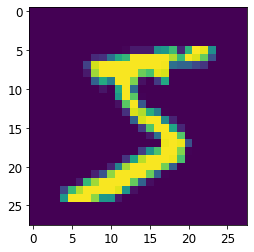

This is a 5


In [7]:
# 2) Train a binary classifier of your choice to distinguish between two classes, 4 and not-4

# display the first digit and its label value of the training set
plt.imshow(X_train[0].reshape((28,28)))
plt.show()
print(f"This is a {y_train[0]}")

In [8]:
# create the 4 and not-4 target values
y_train_4 = (y_train == '4')
y_test_4 = (y_test == '4')

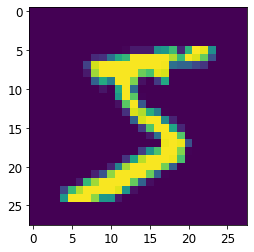

This is not a four


In [9]:
# display the first digit and its label value of the training set
plt.imshow(X_train[0].reshape((28,28)))
plt.show()
print(f"This is {'a four' if y_train_4[0] else 'not a four'}")

In [10]:
# 3) Use 3-fold cross validation and evaluate your model by calculating the metrics: accuracy, recall, and
#    precision. Compare the accuracy of your model to the accuracy of a model that always guesses that an
#    image is not a 4

# train SGD classifier 
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(random_state=42)

In [13]:
# calculate the accuracy, recall and precision of the training set
from sklearn.model_selection import cross_validate
scores = cross_validate(sgd_clf, X_train, y_train_4, cv=3, scoring=['accuracy', 'recall', 'precision'])

In [14]:
print(f"Accuracy of each fold: {scores['test_accuracy']}, mean accuracy: {100*scores['test_accuracy'].mean():.1f}%")
print(f"Recall of each fold: {scores['test_recall']}, mean recall: {100*scores['test_recall'].mean():.1f}%")
print(f"Precision of each fold: {scores['test_precision']}, mean precision: {100*scores['test_precision'].mean():.1f}%")

Accuracy of each fold: [0.9671  0.97645 0.9687 ], mean accuracy: 97.1%
Recall of each fold: [0.94350282 0.8366718  0.93531828], mean recall: 90.5%
Precision of each fold: [0.77023061 0.91414141 0.78466839], mean precision: 82.3%


In [27]:
# accuracy(an image is not a 4)=sum up all the correct guesses, the non-4 images in the dataset/the total number of images. 
non_4_accuracy = (y_train_4 == 0).sum()/len(y_train_4)
print (f"Accuracy of a model that always guesses not a 4: {100*non_4_accuracy:.1f}%")

Accuracy of a model that always guesses not a 4: 90.3%


## comment:

The accuracy of the model that always guesses an image is not a 4 is 90.3%. So we have to be very careful when we use accuracy as a metric of evaluation because is correlated with the balance of the dataset and sometimes could be misleading. In cases that one class is more prevalent from another a model that always predict the majority class can achieve high accuracy even without truly learning the underlying patterns. As a result we have to use additional evaluation metrics such as precision, recall, F1 score, or area under the receiver operating characteristic curve (AUC-ROC) in order to take more integrated and comprehensive evaluation.

In [17]:
# 4) Calculate the confusion matrix for the train set. How many of the train samples were wrongly classified
#     as 4s and how many wrongly classified as non-4s?

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[52957,  1201],
       [  554,  5288]], dtype=int64)

## comment:
The confusion matrix shows that the model made 52,957 correct negative (TN) predictions, 1,201 false positive (FP) predictions, 554 false negative (FN) predictions, and 5,288 correct positive (TP) predictions.

In [19]:
# 5) Plot the ROC curve and calculate the area under the curve (AUC).

y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3, method="decision_function")

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_4, y_scores)

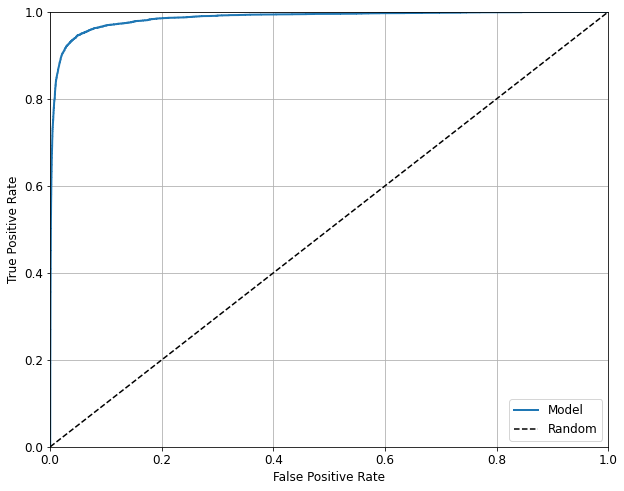

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(10, 8))                  
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.axis([0, 1, 0, 1])              
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()

plot_roc_curve(fpr, tpr, "Model")

In [24]:
# calculate the area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_4, y_scores)

0.9859276923382874

## comment:
We observe that AUC which is 0.98 very close to 1 and the ROC curve perform very well to our training data